<a href="https://colab.research.google.com/github/RohanSadawarte43/AMS-Group-3/blob/main/ResearchAnalysis_Rohan/Commit2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data 1 - 5 Files

In [ ]:
file_names =  ['HERDrankings.csv','DRFrankings.csv','GSSrankings.csv','FACrankings.csv']
Files = []
for i in file_names:
  Files.append('/content/drive/Shareddrives/DSF_Project/Datasets_Research/'+ i)
print(Files)

['/content/drive/Shareddrives/DSF_Project/Datasets_Research/HERDrankings.csv', '/content/drive/Shareddrives/DSF_Project/Datasets_Research/DRFrankings.csv', '/content/drive/Shareddrives/DSF_Project/Datasets_Research/GSSrankings.csv', '/content/drive/Shareddrives/DSF_Project/Datasets_Research/FACrankings.csv']


## Clean Data

In [ ]:
import pandas as pd

def read_csv(path):
  df = pd.read_csv(path)
  # print(df.head())
  return df

In [ ]:
def new_headers(df):
  new_header = df.iloc[2]
  df = df[3:]  # Remove the 3rd row
  df.columns = new_header
  return df

In [ ]:
def drop_top(df):
  df = df.drop(3)
  return df

In [ ]:
def reset_index(df):
  df = df.reset_index(drop=True)
  df.head()
  return df

In [ ]:
def new_cols(df, data_field, yrs_gap):
  # # print(df.columns)
  # df.drop(df.columns[14:], axis=1, inplace=True)
  new_columns = ['Institution']
  for i in range(yrs_gap[0], yrs_gap[1]-1, -1*yrs_gap[2]):
    new_columns.append(str(i)+'_'+data_field+'_Rank')
    new_columns.append(str(i)+'_'+data_field+'_Percentile')
    new_columns.append(str(i)+'_'+data_field)
    new_columns.append(str(i)+'_NaN')
  # print(len(new_columns), new_columns)
  df = df.iloc[:, :len(new_columns)]
  # df.drop(df.columns[len(new_columns):], axis=1, inplace=True)
  df.columns = new_columns
  return df

In [ ]:
def drop_cols(df):
  columns_to_drop = []
  for i in df.columns:
    if i.endswith('_NaN'):
      columns_to_drop.append(i)
  df = df.drop(columns=columns_to_drop, axis=1)
  return df

In [ ]:
def drop_last(df, num_rows):
  df = df.drop(df.index[-1*num_rows:])
  return df

In [ ]:
def str_to_int(df):
  columns_to_convert =df.columns[1:]
  for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column].str.replace(',', ''), errors='coerce')

  # df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
  # print(df.head())
  # print(df.tail())
  return df

In [ ]:
def hist_cols(df, end_str):
  hist_cols = []
  for i in df.columns:
    if i.endswith(end_str):
      hist_cols.append(i)
  return hist_cols

In [ ]:
def get_means(df, cols):
  row_means = df.mean()
  return list(row_means[cols])

In [ ]:
def get_sbu(df):
  sbu = df[df['Institution'] == "SUNY, Stony Brook U."]
  return sbu

In [ ]:
def make_list_sbu(sbu, cols):
  return list(sbu[cols].iloc[0])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
def plot_bar(row_means, sbu_list, y_ax, yrs_gap ):
  data = {'Category': list(range(yrs_gap[0], yrs_gap[1]-1, -1*yrs_gap[2])),
          'Mean': row_means,
          'SingleRow': sbu_list}
  df1 = pd.DataFrame(data)

  # Specify the columns you want to compare
  columns_to_compare = ['Mean', 'SingleRow']

  # Extract data for the comparison
  categories = df1['Category']
  data_to_plot = df1[columns_to_compare]

  # Set the width of the bars for better visibility
  bar_width = 0.35

  # Create a bar chart
  x = range(len(categories))
  plt.bar(x, data_to_plot['Mean'], width=bar_width, label='Mean')
  plt.bar([i + bar_width for i in x], data_to_plot['SingleRow'], width=bar_width, label='Stony Brook University',color='#D52027')

  # Add labels and title
  plt.xlabel('Year')
  plt.ylabel(y_ax)
  plt.title(y_ax+' YoY')
  plt.xticks([i + bar_width / 2 for i in x], categories)
  plt.legend()

  # Show the chart
  plt.show()


<ipython-input-183-e9f4b9c23254>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  row_means = df.mean()


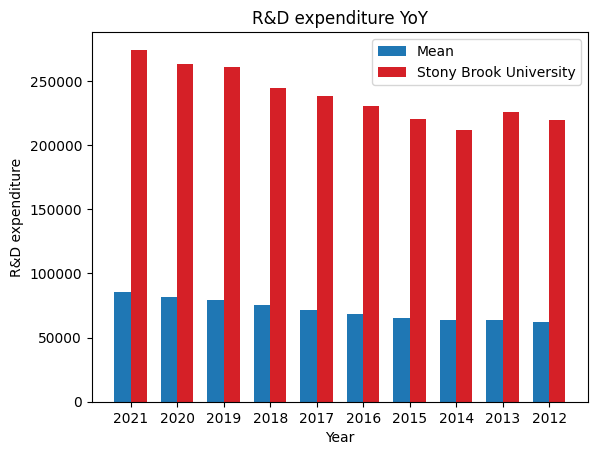

<ipython-input-183-e9f4b9c23254>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  row_means = df.mean()


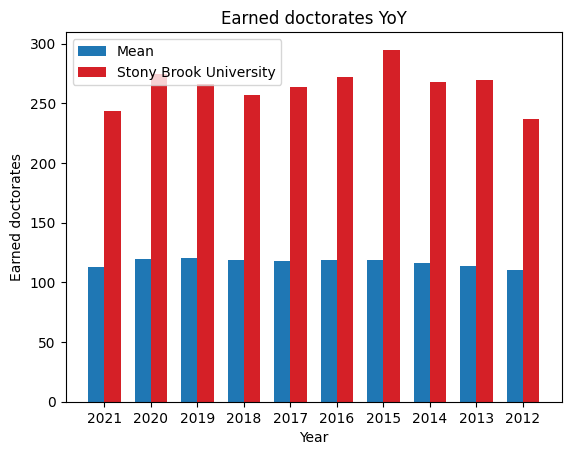

<ipython-input-183-e9f4b9c23254>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  row_means = df.mean()


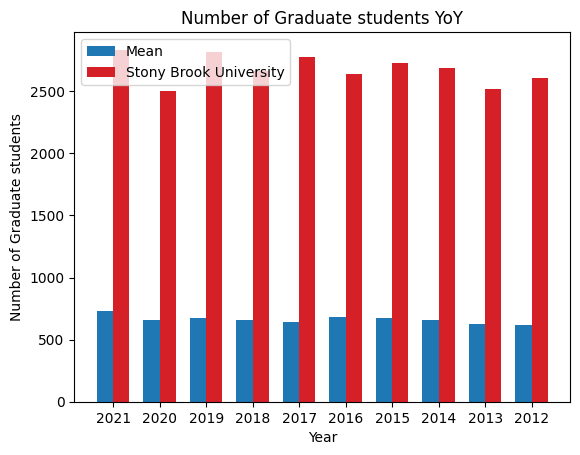

<ipython-input-183-e9f4b9c23254>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  row_means = df.mean()


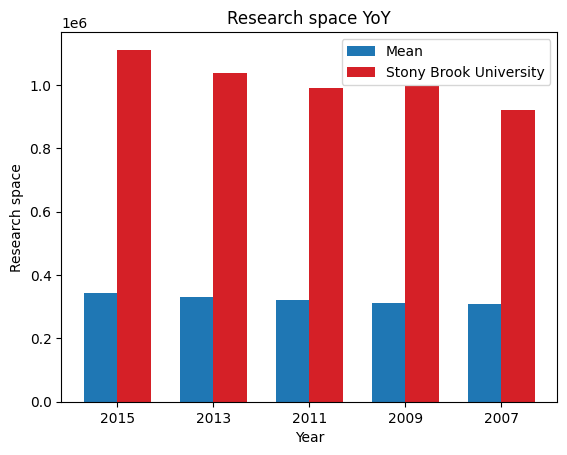

In [ ]:
Datasets = ['R&D expenditure','Earned doctorates','Number of Graduate students','Research space']
tail_rows = [12,10,10,10]
yrs_gaps = [[2021, 2012, 1], [2021, 2012, 1], [2021, 2012, 1], [2015, 2007, 2]]
# Files = ['/content/FACrankings.csv']
# Datasets = ['Research space']
# tail_rows = [20]

for file, data, tail_rows, yrs_gap in zip(Files, Datasets, tail_rows, yrs_gaps):
  df = read_csv(file)
  df = new_headers(df)
  df = drop_top(df)
  df = reset_index(df)
  df = new_cols(df, data, yrs_gap)
  df = drop_cols(df)
  df = drop_last(df, tail_rows)
  df = str_to_int(df)
  plot_cols = hist_cols(df, data)
  row_means = get_means(df,plot_cols)
  sbu = get_sbu(df)
  sbu_list = make_list_sbu(sbu, plot_cols)
  plot_bar(row_means, sbu_list, data, yrs_gap)

## Make 4 Dataframes from data for all the data

In [ ]:
Datasets = ['R&D expenditure','Earned doctorates','Number of Graduate students','Research space']
tail_rows = [12,10,10,10]
yrs_gaps = [[2021, 2012, 1], [2021, 2012, 1], [2021, 2012, 1], [2015, 2007, 2]]

for file, data, tail_rows, yrs_gap in zip(Files, Datasets, tail_rows, yrs_gaps):
  df = read_csv(file)
  df = new_headers(df)
  df = drop_top(df)
  df = reset_index(df)
  df = new_cols(df, data, yrs_gap)
  df = drop_cols(df)
  df = drop_last(df, tail_rows)
  df = str_to_int(df)

  if data == 'R&D expenditure':
    rnd_exp = df
  if data == 'Earned doctorates':
    earned_drs = df
  if data == 'Number of Graduate students':
    grad_studs = df
  if data == 'Research space':
    research_sp = df


In [ ]:
rnd_exp = rnd_exp.sort_values(by='Institution')
earned_drs = earned_drs.sort_values(by='Institution')
grad_studs = grad_studs.sort_values(by='Institution')
research_sp = research_sp.sort_values(by='Institution')

In [ ]:
rnd_exp.head()

,Institution,2021_R&D expenditure_Rank,2021_R&D expenditure_Percentile,2021_R&D expenditure,2020_R&D expenditure_Rank,2020_R&D expenditure_Percentile,2020_R&D expenditure,2019_R&D expenditure_Rank,2019_R&D expenditure_Percentile,2019_R&D expenditure,...,2015_R&D expenditure,2014_R&D expenditure_Rank,2014_R&D expenditure_Percentile,2014_R&D expenditure,2013_R&D expenditure_Rank,2013_R&D expenditure_Percentile,2013_R&D expenditure,2012_R&D expenditure_Rank,2012_R&D expenditure_Percentile,2012_R&D expenditure
778,A.T. Still U.,779,85.8,448,706,77.4,656,721,79.2,644,...,4571,374,42.7,5892,398,45.5,4569,454,51.3,3247
424,Abilene Christian U.,425,47.2,4597,495,54.5,2631,659,72.4,979,...,671,743,83.9,499,704,79.8,605,727,81.7,651
530,Adelphi U.,531,58.8,2157,610,67.0,1258,820,89.9,359,...,175,855,96.4,227,866,98.0,190,887,99.4,165
822,Agnes Scott C.,823,90.6,351,910,99.5,152,880,96.4,229,...,387,785,88.6,391,819,92.7,288,622,70.0,1213
213,Air Force Institute of Technology,214,24.2,45703,232,26.0,35584,233,26.2,34016,...,26866,244,28.2,23902,239,27.7,27592,227,26.1,32746


In [ ]:
earned_drs.head()

,Institution,2021_Earned doctorates_Rank,2021_Earned doctorates_Percentile,2021_Earned doctorates,2020_Earned doctorates_Rank,2020_Earned doctorates_Percentile,2020_Earned doctorates,2019_Earned doctorates_Rank,2019_Earned doctorates_Percentile,2019_Earned doctorates,...,2015_Earned doctorates,2014_Earned doctorates_Rank,2014_Earned doctorates_Percentile,2014_Earned doctorates,2013_Earned doctorates_Rank,2013_Earned doctorates_Percentile,2013_Earned doctorates,2012_Earned doctorates_Rank,2012_Earned doctorates_Percentile,2012_Earned doctorates
278,Adelphi U.,279,62.6,23,272,60.8,25,260,58.5,29,...,26,233,55.6,37,243,58.6,27,274,66.8,19
261,Air Force Institute of Technology,262,58.8,26,268,59.9,27,244,54.9,35,...,40,238,56.7,35,219,52.9,39,230,56.2,34
395,Alabama A&M U.,396,88.5,4,352,78.4,9,412,92.2,3,...,4,348,82.6,7,355,85.3,7,312,75.9,11
319,Alabama State U.,320,71.7,14,299,66.7,18,396,88.7,4,...,12,312,74.1,14,308,74.1,13,320,77.8,10
333,Albany Medical C.,334,74.8,11,352,78.4,9,387,86.7,5,...,12,356,84.5,6,344,82.6,8,341,82.9,7


In [ ]:
grad_studs.head()

,Institution,2021_Number of Graduate students_Rank,2021_Number of Graduate students_Percentile,2021_Number of Graduate students,2020_Number of Graduate students_Rank,2020_Number of Graduate students_Percentile,2020_Number of Graduate students,2019_Number of Graduate students_Rank,2019_Number of Graduate students_Percentile,2019_Number of Graduate students,...,2015_Number of Graduate students,2014_Number of Graduate students_Rank,2014_Number of Graduate students_Percentile,2014_Number of Graduate students,2013_Number of Graduate students_Rank,2013_Number of Graduate students_Percentile,2013_Number of Graduate students,2012_Number of Graduate students_Rank,2012_Number of Graduate students_Percentile,2012_Number of Graduate students
304,A.T. Still U.,305.0,44.6,289.0,301.0,43.7,284.0,375.0,54.3,170.0,...,92.0,504.0,73.5,68.0,436.0,78.7,82.0,512.0,92.3,23.0
395,Abilene Christian U.,396.0,57.7,154.0,408.0,58.9,135.0,407.0,58.8,133.0,...,94.0,459.0,67.0,94.0,431.0,77.8,90.0,428.0,77.3,95.0
254,Adelphi U.,255.0,37.4,398.0,289.0,42.0,304.0,289.0,42.0,302.0,...,387.0,242.0,35.7,426.0,242.0,44.1,422.0,228.0,41.6,464.0
217,Air Force Institute of Technology,218.0,32.1,515.0,214.0,31.3,521.0,214.0,31.3,503.0,...,482.0,215.0,31.8,542.0,215.0,39.2,530.0,219.0,40.0,499.0
322,Alabama A&M U.,323.0,47.2,261.0,319.0,46.2,248.0,272.0,39.6,329.0,...,326.0,423.0,61.8,122.0,404.0,73.0,118.0,442.0,79.8,87.0


In [ ]:
research_sp.head()

,Institution,2015_Research space_Rank,2015_Research space_Percentile,2015_Research space,2013_Research space_Rank,2013_Research space_Percentile,2013_Research space,2011_Research space_Rank,2011_Research space_Percentile,2011_Research space,2009_Research space_Rank,2009_Research space_Percentile,2009_Research space,2007_Research space_Rank,2007_Research space_Percentile,2007_Research space
583,A.T. Still U.,0,0.0,0,457,77.8,39771,439,76.5,39771,0,0.0,0,448,76.4,32112
544,Abilene Christian U.,545,93.5,13289,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0
584,Agnes Scott C.,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0
319,Alabama A&M U.,320,55.3,103500,320,54.7,103500,310,54.3,103500,306,54.1,103500,304,52.1,103500
176,Alabama State U.,177,30.9,307692,174,30.1,307692,172,30.5,307692,174,31.1,307692,171,29.7,307692


# The use of Fuzzy Logic - Include Mappings and merge

In [ ]:
!pip install fuzzywuzzy

In [ ]:
# Load the second file
import pandas as pd


file_path_1 = '/content/drive/Shareddrives/DSF_Project/Research_Space/Research_Space_per_Department_by_University.csv'
rnd_space = pd.read_csv(file_path_1)

file_path_2 = '/content/drive/Shareddrives/DSF_Project/skiena_ranking_data.csv'
sk_db = pd.read_csv(file_path_2)

sk_db['Name_duplicate'] = sk_db['Name'].copy()
rnd_space['Institution_duplicate'] = rnd_space['Institution'].copy()

df1 = sk_db.copy()
df1 = df1.sort_values(by='Name_duplicate')

df2 = rnd_space.copy()
df2 = df2.sort_values(by='Institution_duplicate')

def remove_unnecessary_stopwords(df1,df2):
  df1['Name_duplicate'] = df1['Name_duplicate'].str.replace('Cal\.', 'California')
  # df1['Name_duplicate'] = df1['Name_duplicate'].str.replace('University', '')
  df1['Name_duplicate'] = df1['Name_duplicate'].str.replace('The', '')
  df2['Institution_duplicate'] = df2['Institution_duplicate'].str.replace('C\.', 'College')
  # df2['Institution_duplicate'] = df2['Institution_duplicate'].str.replace('University', '')
  df2['Institution_duplicate'] = df2['Institution_duplicate'].str.replace('U\.', 'University')
  df2['Institution_duplicate'] = df2['Institution_duplicate'].str.replace('The', '')
  return df1, df2

df2

,Institution,Rank,All fields,Agricultural sciences,Biological and biomedical sciences,Computer and information sciences,Engineering,"Geosciences, atmospheric sciences, and ocean sciences",Health sciences,Mathematics and statistics,Natural resources and conservation,Physical sciences,Psychology,Social sciences,Other,Institution_duplicate
544,Abilene Christian U.,545,13,1,2,2,4,0,1,1,1,2,0,0,0,Abilene Christian U.
319,Alabama A&M U.,320,104,35,7,1,20,0,0,1,35,5,0,0,0,Alabama A&M U.
176,Alabama State U.,177,308,0,70,35,5,0,80,35,0,25,33,25,0,Alabama State U.
563,Alaska Pacific U.,564,7,0,1,1,0,0,1,0,5,1,0,0,0,Alaska Pacific U.
521,Albany C. of Pharmacy and Health Sciences,522,20,0,13,0,0,0,7,0,0,0,0,0,0,Albany C. of Pharmacy and Health Sciences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Wright State U.,250,166,3,73,11,29,0,4,0,12,20,10,2,0,Wright State U.
393,Xavier U. Louisiana,394,66,0,11,2,2,0,36,1,0,13,1,1,0,Xavier U. Louisiana
15,Yale U.,16,"2,523",0,743,31,121,39,"1,016",18,47,243,41,185,39,Yale U.
515,Yeshiva U.,516,21,0,5,*,0,0,1,0,0,7,8,*,0,Yeshiva U.


In [ ]:
from fuzzywuzzy import process

thresholds = [86, 87.5, 86, 85, 80]
# thresholds = [86]
all_mappings = []


for index, threshold in enumerate(thresholds):

  # Creating a dictionary to map the closest matches from df1 to df2
  # We will use the 'Institution' column from df1 and 'Name' column from df2 for matching

  if index == 1:
    df1,df2 = remove_unnecessary_stopwords(df1,df2)
    sk_db,rnd_space = remove_unnecessary_stopwords(sk_db,rnd_exp)

  mapping = {}

  for _, row in df1.iterrows():

    pe = process.extractOne(row['Name_duplicate'], df2['Institution_duplicate'])
    # print(row['Name'], pe)

    if pe[1] > threshold :
      mapping[row['Name']] = pe[0]

      df1 = df1.drop(_)
      df2 = df2[~df2['Institution_duplicate'].isin(mapping.values())]

      rnd_space.loc[rnd_space['Institution_duplicate'] == pe[0], 'matched_name'] = row['Name']

  # mapping = {row['Institution']: process.extractOne(row['Institution'], df2['Name'])[0]
  #           for _, row in df1.iterrows() if process.extractOne(row['Institution'], df2['Name'])[1] > threshold}

  # Applying the mapping to create a new 'matched_name' column in df1
  # rnd_exp['matched_name'] = rnd_exp['Institution'].map(mapping)
  # sk_db['matched_name'] = sk_db['Name'].map(mapping)

  # print(rnd_exp[rnd_exp['matched_name'].notnull()][['matched_name','Institution']])
  # print()

  all_mappings.append(mapping)

  # df1 = df1[~df1['Institution'].isin(mapping.keys())]
  # df2 = df2[~df2['Name'].isin(mapping.values())]



<ipython-input-169-66675928b982>:21: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Name_duplicate'] = df1['Name_duplicate'].str.replace('Cal\.', 'California')
<ipython-input-169-66675928b982>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Institution_duplicate'] = df2['Institution_duplicate'].str.replace('C\.', 'College')
<ipython-input-169-66675928b982>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Institution_duplicate'] = df2['Institution_duplicate'].str.replace('C\.', 'College')
<ipython-input-169-66675928b982>:26: FutureWarning: The default value of regex will change from True to False in a future version.
  df2['Institut

In [ ]:
for i in all_mappings:
  print(len(i.items()))

235
114
2
153
0


In [ ]:
all_mappings

[{' Univ. of Alabama in Huntsville': 'U. Alabama, Huntsville',
  ' Univ. of Tennessee at Chattanooga': 'U. Tennessee, Chattanooga',
  ' Univ. of Tennessee, Knoxville': 'U. Tennessee, Knoxville',
  ' Univ. of Texas at San Antonio': 'U. Texas, San Antonio',
  'American University': 'American U.',
  'Amherst College': 'Amherst C.',
  'Appalachian State University': 'Appalachian State U.',
  'Arizona State University': 'Arizona State U.',
  'Arkansas State University': 'Kansas State U.',
  'Augusta University': 'Augusta U.',
  'Azusa Pacific University': 'Azusa Pacific U.',
  'Ball State University': 'Ball State U.',
  'Barnard College': 'Barnard C.',
  'Bates College': 'Bates C.',
  'Baylor University': 'Baylor U.',
  'Biola University': 'Biola U.',
  'Boise State University': 'Boise State U.',
  'Boston College': 'Boston C.',
  'Boston University': 'Boston U.',
  'Bowdoin College': 'Bowdoin C.',
  'Bowling Green State University': 'Bowling Green State U.',
  'Brandeis University': 'Brand

In [ ]:
rnd_space[rnd_space['matched_name'].notnull()][['matched_name','Institution']]

,matched_name,Institution
498,"Cal. State, Pomona",Alabama State U.
632,Seattle Pacific University,Alaska Pacific U.
270,Albion College,Albany Medical C.
88,Allegheny College,Albert Einstein College of Medicine
317,Metropolitan State University,Alcorn State U.
...,...,...
431,University of West Georgia,West Chester U. Pennsylvania
607,University of Maine at Machias,West Virginia School of Osteopathic Medicine
252,Western Michigan University,Western Michigan U. and Homer Stryker M.D. Sch...
701,Wheaton College,"Wheaton C., Wheaton"


In [ ]:
merged_df_sk = pd.merge(sk_db, rnd_exp, left_on='Name', right_on='matched_name', how='inner')
merged_df_sk = pd.merge(merged_df_sk, earned_drs, left_on='Institution', right_on='Institution', how='left')
merged_df_sk = pd.merge(merged_df_sk, grad_studs, left_on='Institution', right_on='Institution', how='left')

In [ ]:
merged_df_sk.shape

(534, 143)

In [ ]:
for i in merged_df_sk.columns: print(i)

Unnamed: 0
School
UNITID
Ranking
Average SAT Score
Completion Rate in 6 years
Endowment
Sports Performance Score
Research Expenses
Enrollment
Average Family Income
Admission Rate
Less Frequent Gender Percentage
Founding Date
Galloway Score
Student to Faculty Ratio
Racial Overrepresentation
First Generation Percentage
Cost of Attendance
Minority Percentage
Endowment Start
Visit Last 6 Months
Sports Score
Applicants
Average ACT Score
Student Life
NPV10
NPV15
NPV20
NPV30
NPV40
International Percentage
Instructional Wage FT
Endowment FT
research ranking
Citations per Faculty
Social Mobility Rate
Social Media Followers
Wiki Hits
Wiki Length
Wiki Page Rank
CONTROL
Carnegie Classification
Followers on Twitter
Institutional
Name
Research and Scholarship
Social Good
State
Name_duplicate
Institution
2021_R&D expenditure_Rank
2021_R&D expenditure_Percentile
2021_R&D expenditure
2020_R&D expenditure_Rank
2020_R&D expenditure_Percentile
2020_R&D expenditure
2019_R&D expenditure_Rank
2019_R&D expend

# Graphs

In [ ]:
print(rnd_exp.columns)
print(earned_drs.columns)
print(grad_studs.columns)
print(rnd_space.columns)

Index(['Institution', '2021_R&D expenditure_Rank',
       '2021_R&D expenditure_Percentile', '2021_R&D expenditure',
       '2020_R&D expenditure_Rank', '2020_R&D expenditure_Percentile',
       '2020_R&D expenditure', '2019_R&D expenditure_Rank',
       '2019_R&D expenditure_Percentile', '2019_R&D expenditure',
       '2018_R&D expenditure_Rank', '2018_R&D expenditure_Percentile',
       '2018_R&D expenditure', '2017_R&D expenditure_Rank',
       '2017_R&D expenditure_Percentile', '2017_R&D expenditure',
       '2016_R&D expenditure_Rank', '2016_R&D expenditure_Percentile',
       '2016_R&D expenditure', '2015_R&D expenditure_Rank',
       '2015_R&D expenditure_Percentile', '2015_R&D expenditure',
       '2014_R&D expenditure_Rank', '2014_R&D expenditure_Percentile',
       '2014_R&D expenditure', '2013_R&D expenditure_Rank',
       '2013_R&D expenditure_Percentile', '2013_R&D expenditure',
       '2012_R&D expenditure_Rank', '2012_R&D expenditure_Percentile',
       '2012_R&D expendi

In [ ]:
import pandas as pd
import seaborn as sns

# Assuming you have a DataFrame named 'merged_df'
suffix1 = 'Rank'
suffix2 = "Percentile"
prefix_base = '2021'

df_2021 = pd.DataFrame()
merged_df_2021 = pd.merge(rnd_exp[['Institution', '2021_R&D expenditure']], earned_drs[['Institution', '2021_Earned doctorates']], on='Institution')
merged_df_2021 = pd.merge(merged_df_2021, grad_studs[['Institution', '2021_Number of Graduate students']], on='Institution')
merged_df_2021 = pd.merge(merged_df_2021, rnd_space[['Institution', 'All fields']], on='Institution')

merged_df_2021.rename(columns={'All fields': '2021_Research_space_total'}, inplace=True)
merged_df_2021

,Institution,2021_R&D expenditure,2021_Earned doctorates,2021_Number of Graduate students,2021_Research_space_total
0,Alabama A&M U.,9065,4,261.0,104
1,Alabama State U.,2631,14,17.0,308
2,Albany Medical C.,22443,11,58.0,139
3,Alfred U.,2660,1,26.0,28
4,American U.,65912,36,1239.0,75
...,...,...,...,...,...
250,William & Mary,68801,51,394.0,315
251,Worcester Polytechnic Institute,48702,62,782.0,143
252,Yale U.,1165148,410,2284.0,"2,523"
253,Yeshiva U.,5452,24,224.0,21


IndexError: ignored

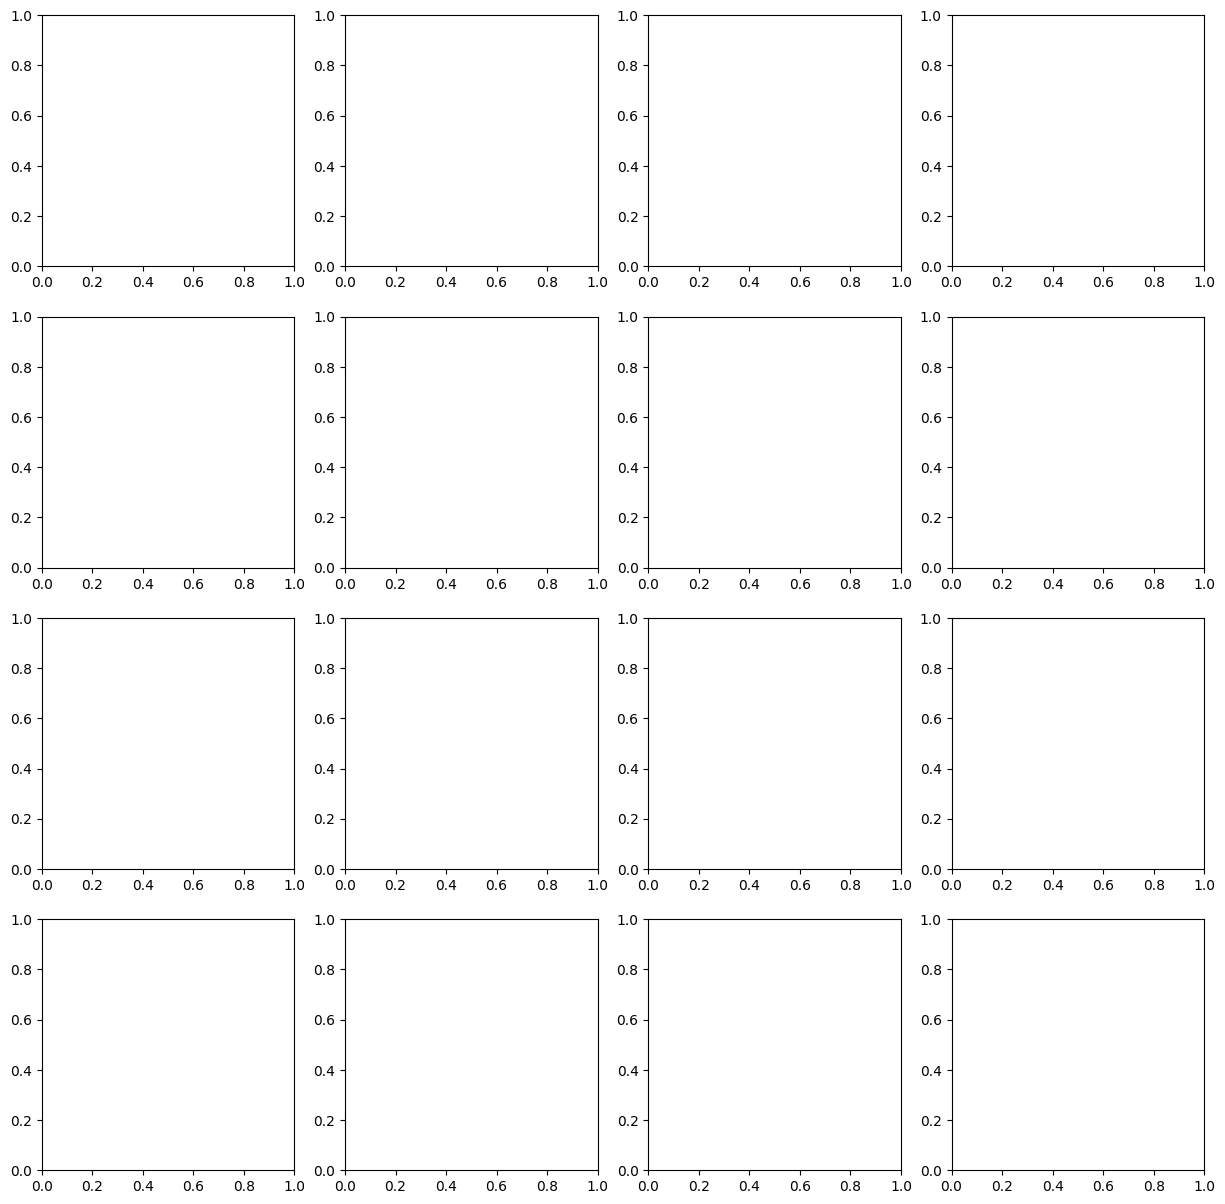

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

df = merged_df_2021
columns = df.columns

# Set up subplots
fig, axes = plt.subplots(nrows=len(columns)-1, ncols=len(columns)-1, figsize=(15, 15))

# Create scatter plots using a nested loop
for i in columns[1:]:
    for j in columns[1:]:
          axes[i, j].scatter(df[i], df[j])
          axes[i, j].set_xlabel(i)
          axes[i, j].set_ylabel(j)

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

# Scrape from Website

In [ ]:
data_fields = {
      # "Earned doctorates" : {
      #     "by major field of study" : 's1'
      # },
      # "Graduate students in science, engineering, and health" : {
      #       "full-time students by characteristic" : 'g1',
      #       "part-time students by characteristic" : 'g2',
      #       'full-time students with financial support from federal sources, by field' : 'g3',
      #       "full-time students with financial support by type and source of support" : 'g4',
      #       "Postdoctorates in science, engineering, and health by characteristic" : 'g5',
      #       'Postdoctorates in science, engineering, and health federally supported' : 'g6'
      # },
      # "R&D expenditures":{
      #   "by field" : 'h1',
      #   "by source of funds and R&D field" : 'h2',
      #   "federally funded, by agency" : 'h3'
      # },
      "Research space and costs for repair and renovation of research space" : {
          "science and engineering research space by field" : 'f1',
          "new construction of science and engineering research space, by field and time of construction" : 'f2',
          "costs for repair and renovation of science and engineering research space by field and time of repair and renovation" : 'f3'
      }
}

In [ ]:
import json

# Pretty print the dictionary
formatted_json = json.dumps(data_fields, indent=4)
print(formatted_json)

{
    "Research space and costs for repair and renovation of research space": {
        "science and engineering research space by field": "f1",
        "new construction of science and engineering research space, by field and time of construction": "f2",
        "costs for repair and renovation of science and engineering research space by field and time of repair and renovation": "f3"
    }
}


In [ ]:
import requests
from urllib.parse import unquote

def download_file(url, destination):
    response = requests.get(url)

    if response.status_code == 200:
        with open(destination, 'wb') as file:
            file.write(response.content)
        print(f"File downloaded successfully to {destination}")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

def download_file_with_original_name(url, destination_folder='.'):
    response = requests.get(url)

    if response.status_code == 200:
        # Extract the filename from the content-disposition header
        content_disposition = response.headers.get('content-disposition')
        if content_disposition:
            filename = unquote(content_disposition.split('filename=')[1]).strip('"')
        else:
            # If content-disposition header is not present, extract filename from URL
            filename = url.split('/')[-1]

        destination_path = f"{destination_folder}/{filename}"

        with open(destination_path, 'wb') as file:
            file.write(response.content)

        print(f"File downloaded successfully to {destination_path}")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")


def download_and_convert_to_csv(url, destination_folder='.'):
    response = requests.get(url)

    if response.status_code == 200:
        # Extract the filename from the content-disposition header
        content_disposition = response.headers.get('content-disposition')
        if content_disposition:
            filename = unquote(content_disposition.split('filename=')[1]).strip('"')
        else:
            # If content-disposition header is not present, extract filename from URL
            filename = url.split('/')[-1]

        destination_xlsx = f"{destination_folder}/{filename}"

        with open(destination_xlsx, 'wb') as file:
            file.write(response.content)

        print(f"Excel file downloaded successfully to {destination_xlsx}")

        try:
            # Convert xlsx to csv using pandas
            df = pd.read_excel(destination_xlsx, engine='openpyxl')
            destination_csv = f"{destination_folder}/{filename.split('.')[0]}.csv"
            df.to_csv(destination_csv, index=False)
            print(f"CSV file saved successfully to {destination_csv}")
        except pd.errors.ParserError as e:
            print(f"Error: {e}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")


In [ ]:
ids = ['U0002001']

for id in ids:

  for field in data_fields:
    for item in data_fields[field]:

        file_url = f'https://ncsesdata.nsf.gov/profiles/site?method=download&tin={id}&id={data_fields[field][item]}'
        destination_path = (field + " " + item+".csv").replace(' ',"_")
        download_and_convert_to_csv(file_url, '/content/')

Excel file downloaded successfully to /content//f1U0002001.xlsx
CSV file saved successfully to /content//f1U0002001.csv


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Excel file downloaded successfully to /content//f2U0002001.xlsx
An unexpected error occurred: File is not a zip file
Excel file downloaded successfully to /content//f3U0002001.xlsx
CSV file saved successfully to /content//f3U0002001.csv


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
import pandas as pd

# Path to the downloaded CSV file
# csv_file_path = '/content/Research_space_and_costs_for_repair_and_renovation_of_research_space_costs_for_repair_and_renovation_of_science_and_engineering_research_space_by_field_and_time_of_repair_and_renovation.csv'  # Update this with your actual path
csv_file_path = '/content/f1U0002001.xlsx'
# Read the CSV file into a DataFrame

df = pd.DataFrame()
for skip_rows in range(1, 100):  # You can adjust the range based on your needs
        try:
            # Read the CSV file into a pandas DataFrame with dynamic skiprows
            df = pd.read_csv(csv_file_path, skiprows=skip_rows, encoding='utf-8')
            # Print the columns of the DataFrame
            print(f"Columns of {csv_file_path} (starting from row {skip_rows + 1}):\n{df.columns}\n")

            # Break the loop if successful reading
            break
        except pd.errors.EmptyDataError:
            # Handle empty data error if encountered
            print(f"Empty data encountered in {csv_file_path}. Skipping to the next file.")
            break
        except pd.errors.ParserError:
            # Handle parser error if encountered
            print(f"Parser error encountered in {csv_file_path}. Trying with a higher skiprows value.")
            continue
        except UnicodeDecodeError:
            continue

# Now you can work with the DataFrame 'df'
df.head()


Parser error encountered in /content/f1U0002001.xlsx. Trying with a higher skiprows value.
Columns of /content/f1U0002001.xlsx (starting from row 24):
Index(['Unnamed: 0'], dtype='object')



,Unnamed: 0
0,NaN
1,NaN
